In [101]:
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt

In [12]:
def slicedata(x_data, y_data, lines):
    '''Slices data given a dictionary of spectral lines and wavelength ranges'''
    lines_dic = {
                    4026: { 'region':[4005, 4033], 'title':'He I $\lambda$4009/26'},
                    4102: { 'region':[4084-20, 4117], 'title':'H$\delta$'},
                    4121: { 'region':[4117, 4135], 'title':'He I $\lambda$4121, Si II $\lambda$4128/32'},
                    4144: { 'region':[4137, 4151], 'title':'He I $\lambda$414'},
                    4267: { 'region':[4260, 4275], 'title':'C II $\lambda$4267'},
                    4340: { 'region':[4320, 4362], 'title':'H$\gamma$'},
                    4388: { 'region':[4380, 4396], 'title':'He I $\lambda$4388'},
                    4471: { 'region':[4465, 4485], 'title':'He I $\lambda$4471, Mg II $\lambda$4481'},
                    4553: { 'region':[4536, 4560], 'title':'Fe II, Si III'} }
    dic = { line: lines_dic[line] for line in lines }
    # self.x_data = x_data
    # self.y_data = y_data
    # print(type())
    # self.dictionary = dictionary
    x_data = pd.Series(x_data)
    y_data = pd.Series(y_data)
    x_data_sliced = []
    y_data_sliced = []
    for line in dic:
        reg = dic[line]['region']
        cond = (x_data > reg[0]) & (x_data < reg[1])
        x_data_sliced.append(np.array(x_data[cond]))
        y_data_sliced.append(np.array(y_data[cond]))
    return x_data_sliced, y_data_sliced

In [7]:
dsnt_A = '/Users/jaime/Science/KUL_postdoc/BBC/291/tomer/ADIS_lguess_K1K2=0.3_94.0_15.0_renorm.txt'
dsnt_B = '/Users/jaime/Science/KUL_postdoc/BBC/291/tomer/BDIS_lguess_K1K2=0.3_94.0_15.0.txt'

dic_lines_A = [4026, 4102, 4121, 4144, 4267, 4340, 4388, 4471, 4553]
dic_lines_B = [4026, 4102, 4121, 4144, 4267, 4340, 4388, 4553]


In [18]:
t0 = time()
df_dsntA = pd.read_csv(dsnt_A, header=None, sep='\t')
df_dsntB = pd.read_csv(dsnt_B, header=None, sep='\t')

dst_A_w_slc, dst_A_f_slc = slicedata(df_dsntA[0], df_dsntA[1], dic_lines_A)
t1 = time()
print(t1-t0)

print(type(dst_A_w_slc), type(dst_A_w_slc[0]))

0.01869678497314453
<class 'list'> <class 'numpy.ndarray'>


In [131]:
def slicedata2(x_data, y_data, lines):
    '''Slices data given a dictionary of spectral lines and wavelength ranges'''
    lines_dic = {
                    4026: { 'region':[4005, 4033], 'title':'He I $\lambda$4009/26'},
                    4102: { 'region':[4084-20, 4117], 'title':'H$\delta$'},
                    4121: { 'region':[4117, 4135], 'title':'He I $\lambda$4121, Si II $\lambda$4128/32'},
                    4144: { 'region':[4137, 4151], 'title':'He I $\lambda$414'},
                    4267: { 'region':[4260, 4275], 'title':'C II $\lambda$4267'},
                    4340: { 'region':[4320, 4362], 'title':'H$\gamma$'},
                    4388: { 'region':[4380, 4396], 'title':'He I $\lambda$4388'},
                    4471: { 'region':[4465, 4485], 'title':'He I $\lambda$4471, Mg II $\lambda$4481'},
                    4553: { 'region':[4536, 4560], 'title':'Fe II, Si III'} }
    dic = { line: lines_dic[line] for line in lines }
    # self.x_data = x_data
    # self.y_data = y_data
    # print(type())
    # self.dictionary = dictionary
    x_data_sliced = []
    y_data_sliced = []
    for line in dic:
        reg = dic[line]['region']
        cond = (x_data > reg[0]) & (x_data < reg[1])
        x_data_sliced.extend(x_data[cond])
        y_data_sliced.extend(y_data[cond])
    return x_data_sliced, y_data_sliced

In [133]:
t0 = time()
df_dsntA = pd.read_csv(dsnt_A, header=None, sep='\t')
df_dsntB = pd.read_csv(dsnt_B, header=None, sep='\t')
dst_A_w_slc, dst_A_f_slc = slicedata2(np.array(df_dsntA[0]), np.array(df_dsntA[1]), dic_lines_A)
t1 = time()
print(t1-t0)


print(type(dst_A_w_slc))
# plt.plot(dst_A_w_slc, dst_A_f_slc)

0.012885093688964844
<class 'list'>


In [62]:
def slicedata3(x_data, y_data, lines):
    '''Slices data given a dictionary of spectral lines and wavelength ranges'''
    lines_dic = {
                    4026: { 'region':[4005, 4033], 'title':'He I $\lambda$4009/26'},
                    4102: { 'region':[4084-20, 4117], 'title':'H$\delta$'},
                    4121: { 'region':[4117, 4135], 'title':'He I $\lambda$4121, Si II $\lambda$4128/32'},
                    4144: { 'region':[4137, 4151], 'title':'He I $\lambda$414'},
                    4267: { 'region':[4260, 4275], 'title':'C II $\lambda$4267'},
                    4340: { 'region':[4320, 4362], 'title':'H$\gamma$'},
                    4388: { 'region':[4380, 4396], 'title':'He I $\lambda$4388'},
                    4471: { 'region':[4465, 4485], 'title':'He I $\lambda$4471, Mg II $\lambda$4481'},
                    4553: { 'region':[4536, 4560], 'title':'Fe II, Si III'} }
    dic = { line: lines_dic[line] for line in lines }
    # self.x_data = x_data
    # self.y_data = y_data
    # print(type())
    # self.dictionary = dictionary
    # x_data_sliced = []
    # y_data_sliced = []
    # for line in dic:
    #     reg = dic[line]['region']
    #     cond = (x_data > reg[0]) & (x_data < reg[1])
    #     x_data_sliced.append(x_data[cond])
    #     y_data_sliced.append(y_data[cond])
    x_data_sliced = [x_data[(x_data > dic[line]['region'][0]) & (x_data < dic[line]['region'][1])] for line in dic]
    y_data_sliced = [y_data[(y_data > dic[line]['region'][0]) & (y_data < dic[line]['region'][1])] for line in dic]
    return x_data_sliced, y_data_sliced

In [100]:
t0 = time()
df_dsntA = pd.read_csv(dsnt_A, header=None, sep='\t').to_numpy()
df_dsntB = pd.read_csv(dsnt_B, header=None, sep='\t').to_numpy()

dst_A_w_slc, dst_A_f_slc = slicedata3(df_dsntA[0], df_dsntA[1], dic_lines_A)
t1 = time()
print(t1-t0)


print(type(dst_A_w_slc), type(dst_A_w_slc[0]))

0.009006023406982422
<class 'list'> <class 'numpy.ndarray'>


In [135]:
10**(11.-12)

0.1

                0         1
0     3960.004318  0.950265
1     3960.204318  0.976512
2     3960.404319  0.987428
3     3960.604319  0.985946
4     3960.804319  0.986002
...           ...       ...
3005  4561.004973  1.001122
3006  4561.204974  1.001165
3007  4561.404974  1.001071
3008  4561.604974  1.000937
3009  4561.804974  1.000794

[3010 rows x 2 columns]


/var/folders/gh/w4d9qdzx74v86rlpf_gw0p_00000gs/T/ipykernel_52302/2219499473.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_dsntB = pd.read_csv(dsnt_B, header=None, sep='\s')


(4325.0, 4357.0)

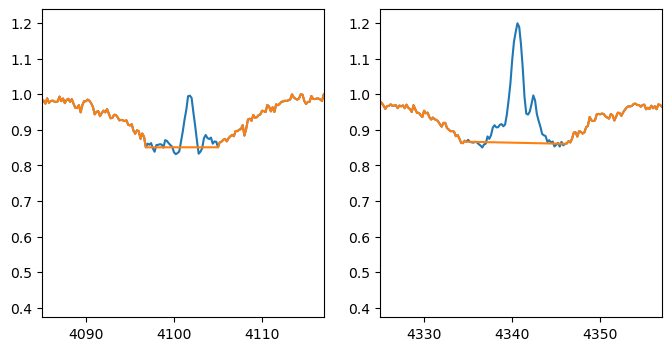

In [173]:
def crop_data(x_data, y_data, range_list):
    '''Crops a range of wavelength between range_n amd range_n+1
        range_list = [[wave0, wave1], [wave3, wave2]]
    '''
    for range in range_list:
        cond = (x_data < range[0]) | (x_data > range[1])
        x_data = x_data[cond]
        y_data = y_data[cond]
    return x_data, y_data

df_dsntA = pd.read_csv(dsnt_A, header=None, sep='\t')
df_dsntB = pd.read_csv(dsnt_B, header=None, sep='\s')
print(df_dsntB)
x_crop, y_crop = crop_data(df_dsntB[0]-0.2, df_dsntB[1], [[4097, 4105], [4335, 4346]])
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].plot(df_dsntB[0]-0.2, df_dsntB[1])
ax[0].plot(x_crop, y_crop)
ax[0].set_xlim(4085, 4117)
ax[1].plot(df_dsntB[0]-0.2, df_dsntB[1])
ax[1].plot(x_crop, y_crop)
ax[1].set_xlim(4325, 4357)
